### Importing Liberaries & Cleanning The Dataset

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df_original = pd.read_csv(r'C:\Users\Mohamed Fawzi\Desktop\Netflix Content Strategy\netflix_content.csv')

df = df_original.copy()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                24812 non-null  object
 1   Available Globally?  24812 non-null  object
 2   Release Date         8166 non-null   object
 3   Hours Viewed         24812 non-null  object
 4   Language Indicator   24812 non-null  object
 5   Content Type         24812 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [2]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show


-   Notice that the Hours Viewed column dtype is not a numerical format, we need to convert it to a float instead

In [3]:
# converting the column to a float instead of a string
df['Hours Viewed'] = df['Hours Viewed'].replace(',', '', regex=True).astype(float)

df['Hours Viewed'].head()

0    812100000.0
1    665100000.0
2    622800000.0
3    507700000.0
4    503000000.0
Name: Hours Viewed, dtype: float64

In [4]:
# Convert the 'Release Date' column to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract year, month, and day from the 'Release Date' column
df['Year'] = df['Release Date'].dt.year
df['Month'] = df['Release Date'].dt.month
df['Day'] = df['Release Date'].dt.day


In [5]:
# convert the Year column to an integer
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)

# Convert the Month column to an integer
df['Month'] = pd.to_numeric(df['Month'], errors='coerce').fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


### Dataset Exploration (EDA):
-   ### Points to Explore:
    -   1. Global Availability Analysis
    -   2. Release Date Analysis
    -   3. Hours Viewed Analysis
    -   4. Language Analysis
    -   5. Seasonal Analysis
    -   6. Correlation Analysis

#### 5. Seasonal Analysis:
- Are there any seasonal trends that can be observed from the fluctuations in viewership?

    

In [6]:
df.head(2)

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Year,Month,Day
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,2023,3,23.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,2023,1,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                24812 non-null  object        
 1   Available Globally?  24812 non-null  object        
 2   Release Date         8166 non-null   datetime64[ns]
 3   Hours Viewed         24812 non-null  float64       
 4   Language Indicator   24812 non-null  object        
 5   Content Type         24812 non-null  object        
 6   Year                 24812 non-null  int32         
 7   Month                24812 non-null  int32         
 8   Day                  8166 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 1.5+ MB


In [8]:
# Creating Month Name Column from the Month column
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr',
    5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

df['Month Name'] = df['Month'].map(month_dict)

In [9]:
# Grouping the viewed hours by release month
monthly_viewed_hours = df.groupby('Month Name')['Hours Viewed'].sum().reset_index()

In [10]:
# sorting the month name column
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_viewed_hours['Month Name'] = pd.Categorical(monthly_viewed_hours['Month Name'], categories=month_order, ordered=True)
monthly_viewed_hours = monthly_viewed_hours.sort_values('Month Name')

#monthly_viewed_hours.columns

monthly_viewed_hours

,Month Name,Hours Viewed
4,Jan,7.271600e+09
3,Feb,7.103700e+09
7,Mar,7.437100e+09
0,Apr,6.865700e+09
8,May,7.094600e+09
6,Jun,8.522000e+09
5,Jul,6.524800e+09
1,Aug,6.817800e+09
11,Sep,7.262200e+09
10,Oct,8.123200e+09


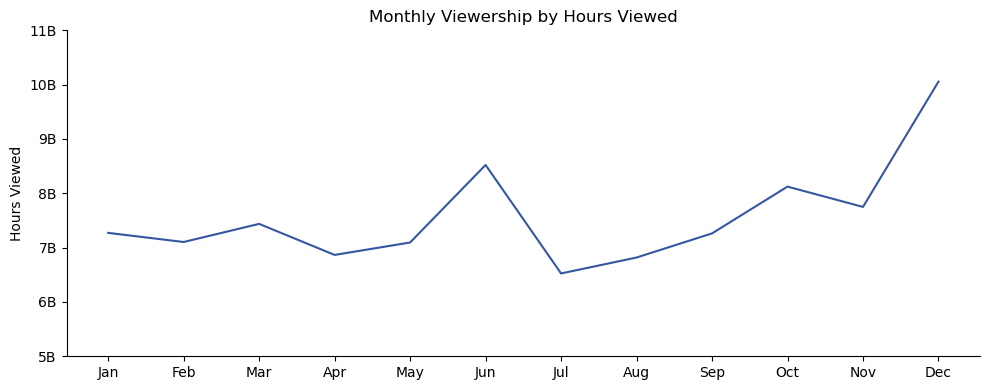

In [11]:
plt.figure(figsize=(10, 4))

sns.lineplot(
    data=monthly_viewed_hours,
    x='Month Name',
    y='Hours Viewed',
    marker='',
    color='#3557A0'
)

def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.0f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().yaxis.set_major_formatter(billion_formatter)

plt.title('Monthly Viewership by Hours Viewed')
plt.xlabel('')
plt.ylim(5000000000, 11000000000)

sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  The number of hours viewed starts at around 7.5 billion in January, and then there's a slight dip in February, but it picks up again in March.
    -  From March to May, the viewership remains relatively stable, fluctuating between 7 billion and 8 billion hours, and June sees a noticeable peak, with approximately 9 billion hours viewed.
    -  After June, there's a decline in July, dropping to about 6.5 billion hours. From July onwards, there's a gradual increase, culminating in a significant rise in December, reaching the highest point of around 10.5 billion hours viewed.

        - This trend might be valuable for understanding viewer behavior, perhaps for optimizing content release strategies throughout the year.

In [12]:
# Now let's analyze the monthly viewership by content type
monthly_viewership_by_content_type = df.pivot_table(index='Month Name',
                                                     columns='Content Type',
                                                     values='Hours Viewed',
                                                     aggfunc='sum').reset_index('Month Name')

monthly_viewership_by_content_type



Content Type,Month Name,Movie,Show
0,Apr,2.757600e+09,4.108100e+09
1,Aug,2.186400e+09,4.631400e+09
2,Dec,2.554900e+09,7.500900e+09
3,Feb,1.654400e+09,5.449300e+09
4,Jan,2.275900e+09,4.995700e+09
5,Jul,1.615700e+09,4.909100e+09
6,Jun,3.135800e+09,5.386200e+09
7,Mar,2.109400e+09,5.327700e+09
8,May,2.520500e+09,4.574100e+09
9,Nov,1.866900e+09,5.882600e+09


In [13]:
# Melting the DataFrame to long-form
df_melted = pd.melt(monthly_viewership_by_content_type, id_vars='Month Name', var_name='Content Type', value_name="Hours Viewed")

# sorting the month name column
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_melted['Month Name'] = pd.Categorical(df_melted['Month Name'], categories=month_order, ordered=True)
df_melted = df_melted.sort_values('Month Name')
df_melted

,Month Name,Content Type,Hours Viewed
4,Jan,Movie,2.275900e+09
16,Jan,Show,4.995700e+09
3,Feb,Movie,1.654400e+09
15,Feb,Show,5.449300e+09
7,Mar,Movie,2.109400e+09
19,Mar,Show,5.327700e+09
0,Apr,Movie,2.757600e+09
12,Apr,Show,4.108100e+09
20,May,Show,4.574100e+09
8,May,Movie,2.520500e+09


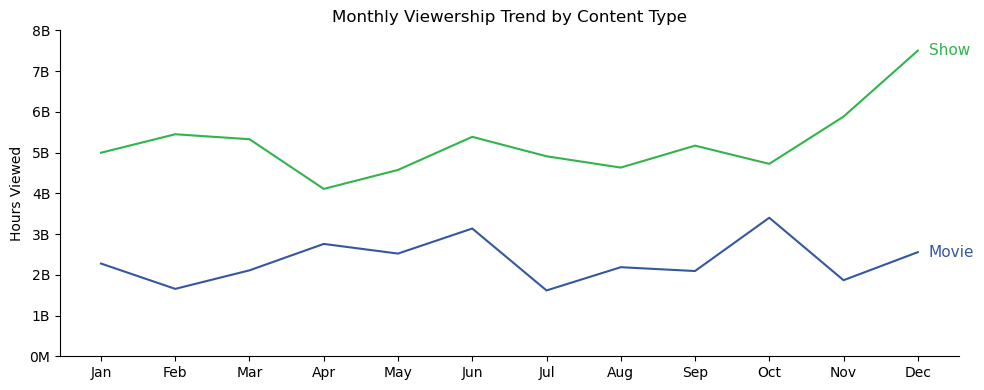

In [14]:
colors = ['#3557A0', '#31B44C']

plt.figure(figsize=(10, 4))

sns.lineplot(data=df_melted,
             x='Month Name',
             y='Hours Viewed',
             hue='Content Type',
             palette=colors,
             legend=False,
                         
             )

def billion_formatter(value, params):
    """Formats tick labels to display billions with abbreviation."""
    if value >= 1e9:
        return f"{value / 1e9:.0f}B"
    elif value <= 1e9:
        return f"{value / 1e6:.0f}M"
    else:
        return f"{value:.1f}"
# Format y-axis tick labels
plt.gca().yaxis.set_major_formatter(billion_formatter)


# Annotating the end of each line
content_types = df_melted['Content Type'].unique()
for content_type in content_types:
    last_value = df_melted[df_melted['Content Type'] == content_type].iloc[-1]
    plt.annotate(content_type,
                 xy=(last_value['Month Name'], last_value['Hours Viewed']),
                 xytext=(8, 0),
                 textcoords='offset points',
                 ha='left',
                 va='center',
                 color=colors[np.where(content_types == content_type)[0][0]],
                 size=11
                 )

plt.title('Monthly Viewership Trend by Content Type')
plt.xlabel('')
plt.ylim(0, 8000000000)


sns.despine()
plt.tight_layout()
plt.show()

-   #### Key Insights:
    -  Shows consistently have higher viewership than movies throughout the year.

    -  Show viewership dips around mid-year, reaching its lowest in June. However, it recovers and increases significantly towards the end of the year, peaking in December.

    -   Movie viewership remains relatively stable with minor fluctuations, peaking slightly in October and ending the year with a slight increase from its starting point.

-   In summary, shows appear to be more popular than movies, particularly towards the end of the year. This could be due to various factors such as new show releases, holiday seasons, or year-end specials. Meanwhile, movie viewership remains relatively consistent with only minor changes.   

#### Testing

In [15]:
# 9. Correlation Analysis
correlation_hours_release = df['Hours Viewed'].corr(df['Release Date'].astype('int64'))

correlation_hours_release

0.16189993015812537

In [16]:
# Create a new DataFrame with the columns of interest
corr_df = df[['Hours Viewed', 'Release Date']]
corr_df['Release Date'].dropna()
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24812 entries, 0 to 24811
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Hours Viewed  24812 non-null  float64       
 1   Release Date  8166 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 387.8 KB


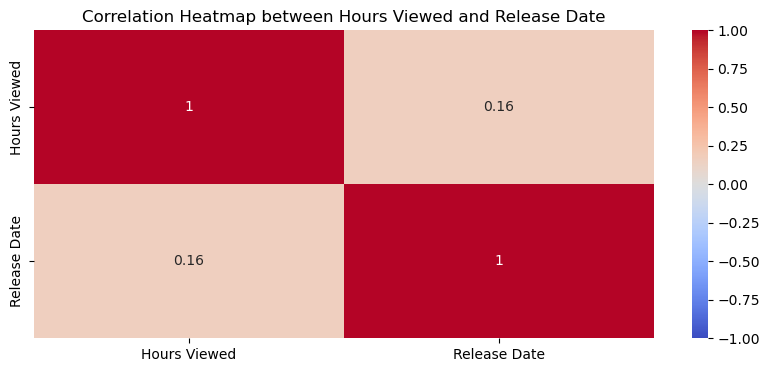

In [17]:


# Calculate the correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)

plt.title('Correlation Heatmap between Hours Viewed and Release Date')
plt.show()